# Aggregating benchmark runs

In [1]:
import pathlib
import typing

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from labm8 import pbutil
from labm8 import viz
from labm8 import labdate
from labm8 import labtypes
from labm8 import prof

from datasets.benchmarks.gpgpu import gpgpu_pb2

In [2]:
LOGDIR = pathlib.Path('/var/phd/shared/datasets/benchmarks/gpgpu/logs')
assert LOGDIR.is_dir()
!echo $(ls {LOGDIR} | wc -l) files

206 files


In [6]:
def KernelInvocationToRow(log: gpgpu_pb2.GpgpuBenchmarkRun, ki: gpgpu_pb2.OpenClKernelInvocation):
    return {
        'date': labdate.DatetimeFromMillisecondsTimestamp(log.run.ms_since_unix_epoch),
        'suite': log.benchmark_suite,
        'benchmark': log.benchmark_name,
        'dataset': log.dataset_name,
        'device': log.run.device.device_name,
        'kernel': ki.kernel_name,
        'global_size': ki.global_size,
        'local_size': ki.local_size,
        'runtime_ms': ki.runtime_ms,
        'transferred_bytes': ki.transferred_bytes,
    }

def LogsToTable(logs: typing.Iterator[gpgpu_pb2.GpgpuBenchmarkRun]):
    rows = []
    for log in logs:
        rows += [KernelInvocationToRow(log, ki) for ki in log.run.kernel_invocation]
    return pd.DataFrame(rows, columns=[
        'date',
        'suite',
        'benchmark',
        'dataset',
        'device',
        'kernel',
        'global_size',
        'local_size',
        'runtime_ms',
        'transferred_bytes',
    ])

with prof.ProfileToStdout():
    df = LogsToTable(pbutil.FromFile(log, gpgpu_pb2.GpgpuBenchmarkRun())
                     for log in LOGDIR.iterdir())
df

completed in 29.596 seconds (started 29 seconds ago)


,date,suite,benchmark,dataset,device,kernel,global_size,local_size,runtime_ms,transferred_bytes
0,2019-02-22 12:57:03.367,amd-app-sdk-3.0,SobelFilter,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,sobel_filter,262144,256,2.129853,2097152
1,2019-02-22 13:06:38.720,rodinia-3.1,hybridsort,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,histogram1024Kernel,6144,96,41.236302,38093000
2,2019-02-22 13:06:38.720,rodinia-3.1,hybridsort,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,bucketcount,7840,32,48.383884,38093000
3,2019-02-22 13:06:38.720,rodinia-3.1,hybridsort,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,bucketprefixoffset,1024,128,40.475746,38093000
4,2019-02-22 13:06:38.720,rodinia-3.1,hybridsort,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,bucketsort,7840,32,41.309228,38093000
5,2019-02-22 13:06:38.720,rodinia-3.1,hybridsort,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,mergeSortFirst,250624,256,40.180076,38093000
6,2019-02-22 13:06:38.720,rodinia-3.1,hybridsort,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,mergeSortPass,248976,208,40.521248,38093000
7,2019-02-22 13:06:38.720,rodinia-3.1,hybridsort,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,mergeSortPass,125008,208,40.395120,38093000
8,2019-02-22 13:06:38.720,rodinia-3.1,hybridsort,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,mergeSortPass,62608,208,40.504089,38093000
9,2019-02-22 13:06:38.720,rodinia-3.1,hybridsort,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,mergeSortPass,31824,208,40.589836,38093000


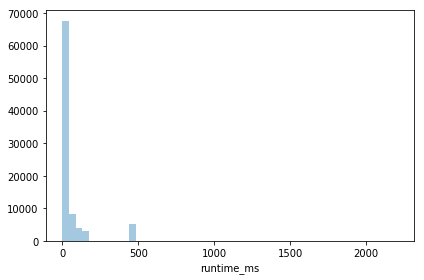

In [7]:
sns.distplot(df.runtime_ms, kde=False)
viz.Finalize()

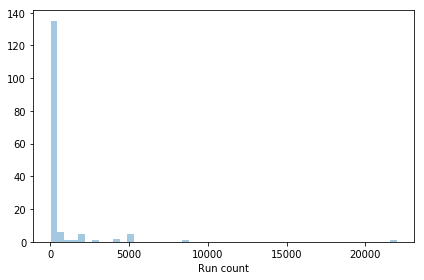

In [8]:
num_runs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).count()['runtime_ms']
sns.distplot(num_runs, kde=False)
plt.xlabel('Run count')
viz.Finalize()

In [9]:
# Sanity check that features are the same across runs.
# TODO(cec): Do we care about global and local sizes being consistent?

def ColumnIsConstantAcrossRuns(df, col):
    """Check that column is consistent across all runs from all devices."""
    mins = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).min()[col]
    maxs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).max()[col]
    mean = (mins == maxs).mean()
    if mean != 1:
        print(f'{mean:.1%} of {col} values are constant')
    return mean == 1

assert ColumnIsConstantAcrossRuns(df, 'transferred_bytes')

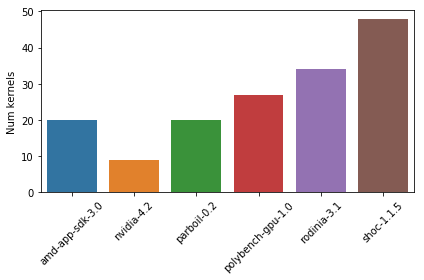

In [10]:
sns.barplot(x='suite', y='global_size', 
            data=df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).mean().groupby(['suite']).count().reset_index())
plt.ylabel('Num kernels')
viz.RotateXLabels(45)
plt.xlabel('')
viz.Finalize()

In [12]:
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device']).mean()

global_size  \
suite           benchmark            kernel                          dataset device                                                   
amd-app-sdk-3.0 AdvancedConvolution  advancedNonSeparableConvolution default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz  262144.0000   
                                     advancedSeparableConvolution    default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz  262144.0000   
                BinomialOption       binomial_options                default GeForce GTX 1080                            16320.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   16320.0000   
                BitonicSort          bitonicSort                     default GeForce GTX 1080                            16384.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   16384.0000   
                BlackScholes         blackScholes                    default GeForce GTX 1080                            65536.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   65536.0000   
                FastWalshTransform   fastWalshTransform              default GeForce GTX 1080                              512.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz     512.0000   
                FloydWarshall        floydWarshallPass               default GeForce GTX 1080                            65536.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   65536.0000   
                Histogram            histogram256_scalar             default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz    8192.0000   
                MatrixMultiplication mmmKernel                       default GeForce GTX 1080                              256.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz     256.0000   
                MatrixTranspose      matrixTranspose                 default GeForce GTX 1080                              256.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz     256.0000   
                MonteCarloAsian      calPriceVega_Scalar             default GeForce GTX 1080                           524288.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz  524288.0000   
                PrefixSum            group_prefixSum                 default GeForce GTX 1080                             1024.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz    4096.0000   
                Reduction            reduce                          default GeForce GTX 1080                              256.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz     256.0000   
                ScanLargeArrays      ScanLargeArrays                 default GeForce GTX 1080                            16384.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   16384.0000   
                                     blockAddition                   default GeForce GTX 1080                            32768.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   32768.0000   
                                     prefixSum                       default GeForce GTX 1080                               64.0000   
                                                                      

In [13]:
# Averages (only the runtime_ms field is averaged, everything else is constant)
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device', 'global_size', 'local_size']).mean()

runtime_ms  \
suite           benchmark            kernel                          dataset device                                    global_size local_size               
amd-app-sdk-3.0 AdvancedConvolution  advancedNonSeparableConvolution default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 262144      256           1.280952   
                                     advancedSeparableConvolution    default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 262144      256           1.441916   
                BinomialOption       binomial_options                default GeForce GTX 1080                          16320       255           0.083712   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 16320       255           3.228094   
                BitonicSort          bitonicSort                     default GeForce GTX 1080                          16384       256           0.023050   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 16384       256           0.073515   
                BlackScholes         blackScholes                    default GeForce GTX 1080                          65536       256           0.303200   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 65536       256           1.258676   
                FastWalshTransform   fastWalshTransform              default GeForce GTX 1080                          512         256           0.034483   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 512         256           0.081878   
                FloydWarshall        floydWarshallPass               default GeForce GTX 1080                          65536       256           0.138076   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 65536       256           0.672785   
                Histogram            histogram256_scalar             default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 8192        128           0.966193   
                MatrixMultiplication mmmKernel                       default GeForce GTX 1080                          256         64            0.059168   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 256         64            0.119103   
                MatrixTranspose      matrixTranspose                 default GeForce GTX 1080                          256         256           0.041792   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 256         256           0.088812   
                MonteCarloAsian      calPriceVega_Scalar             default GeForce GTX 1080                          524288      256           1.560032   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 524288      256          19.196229   
                PrefixSum            group_prefixSum                 default GeForce GTX 1080                          1024        1024          0.028672   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 4096        4096          0.293276   
                Reduction            reduce                          default GeForce GTX 1080                          256         256           0.044064   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 256         256           0.208933   
                ScanLargeArrays      ScanLargeArrays                 default GeForce GTX 1080                          16384       128           0.023104   
                                                             